In [1]:
include("../src/setup.jl")

summary_synth (generic function with 2 methods)

In [3]:
setup = panel_matrices( data1("california_prop99"))
tau_hat = synthdid_estimate(setup.Y, setup.N0, setup.T0);

..\data\california_prop99.csv

In [4]:
summary_synth(tau_hat, panel = setup);

synthdid: -15.604 +- NaN. Effective N0/N0 = 16.388/38~0.431. Effective T0/T0 = 2.783/19 ~ 0.146. N1,T1 = 1, 12.

In [5]:
summary_synth(tau_hat, panel = setup)

synthdid: -15.604 +- NaN. Effective N0/N0 = 16.388/38~0.431. Effective T0/T0 = 2.783/19 ~ 0.146. N1,T1 = 1, 12.

summary_synthdid(-15.603827872733847, NaN, summary_element(1, 12, 38, 19, 16.388188065047263, 19×1 DataFrame
 Row │ weight    
     │ Float64   
─────┼───────────
   1 │ 0.124489
   2 │ 0.105048
   3 │ 0.0782873
   4 │ 0.0703681
   5 │ 0.0575128
   6 │ 0.0533878
   7 │ 0.0478532
   8 │ 0.0451352
  ⋮  │     ⋮
  13 │ 0.0335691
  14 │ 0.0328052
  15 │ 0.0314682
  16 │ 0.0314608
  17 │ 0.028211
  18 │ 0.0259386
  19 │ 0.0216052
   4 rows omitted), summary_element(1, 12, 38, 19, 2.7830519152672832, 3×2 DataFrame
 Row │ weight    time  
     │ Float64   Int64 
─────┼─────────────────
   1 │ 0.427076   1988
   2 │ 0.366471   1986
   3 │ 0.206453   1987))

In [6]:
summary_synth(tau_hat, panel = setup).estimate

synthdid: -15.604 +- NaN. Effective N0/N0 = 16.388/38~0.431. Effective T0/T0 = 2.783/19 ~ 0.146. N1,T1 = 1, 12.

-15.603827872733847

In [7]:
se = sqrt(vcov_synthdid_estimate(tau_hat, method = "placebo"))
se = round(se, digits = 3)
est = round(tau_hat.estimate, digits = 3)


-15.604

In [10]:
sc_estimate(setup.Y, setup.N0, setup.T0);

In [28]:
print(
	"point estimate: $(est)\n95% CI ($(est - 1.96 * se), $(est + 1.96 * se))"
)

point estimate: -15.604
95% CI (-31.72304, 0.5150400000000026)

# The parallel trends plot

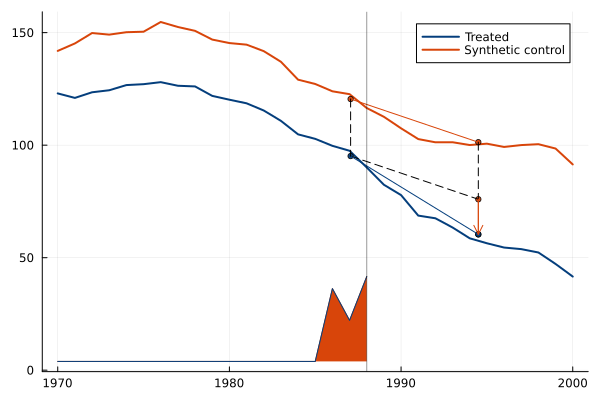

In [31]:
p = synthdid_plot(tau_hat, year_unit_trayectory = setup.time)
plot(p["plot"])

# The control unit contribution plot

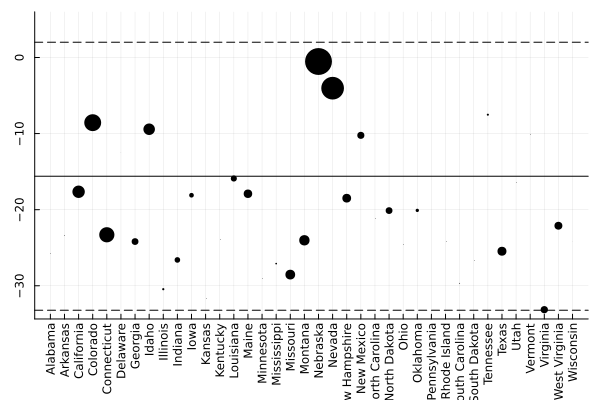

In [34]:
synthdid_units_plot(tau_hat, x_ticks = setup.names)

# checking for pre-treatment parallel trends

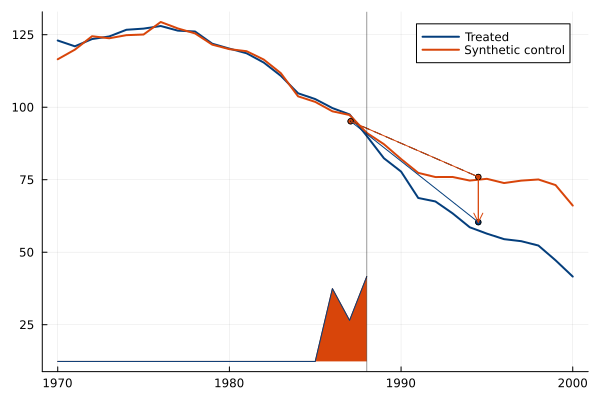

In [35]:
p = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = 1
	)
plot(p["plot"])

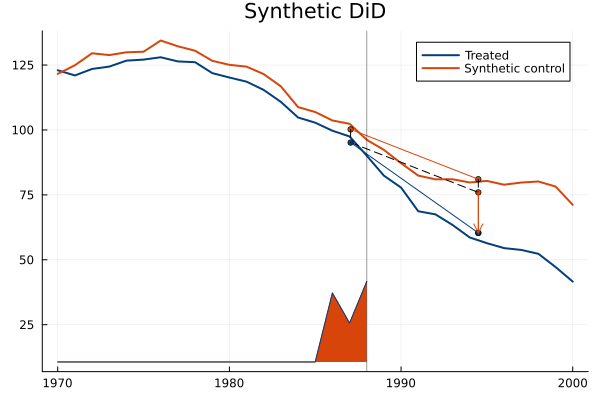

In [47]:
p = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = .8
	)
p1 = plot(p["plot"]) 
title!("Synthetic DiD")

# Compare to other estimators

In [49]:
tau_sc = sc_estimate(setup.Y, setup.N0, setup.T0);

print("Synthetic Diff in Diff: ", tau_hat.estimate, "\nSyntethic control: ", tau_sc.estimate)

Synthetic Diff in Diff: -15.603827872733847
Syntethic control: -19.61966347094579

In [64]:
p_did_s = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = .8
	)
p_did_plot = plot(p_did_s["plot"]) 
# title!("Synthetic DiD")
xlabel!("Synthetic DiD")

p_sc = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = .8
	)
p_sc_plot = plot(p_sc["plot"]);
# title!("Synthetic control");
xlabel!("Synthetic control");
print()


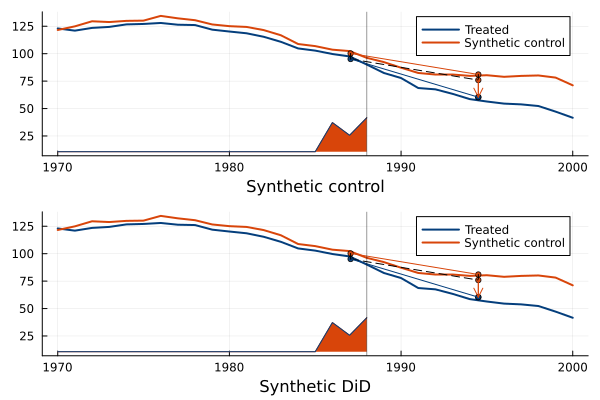

In [65]:
plot!(p_sc_plot, p_did_plot, layout=(2,1))
# p_did_s

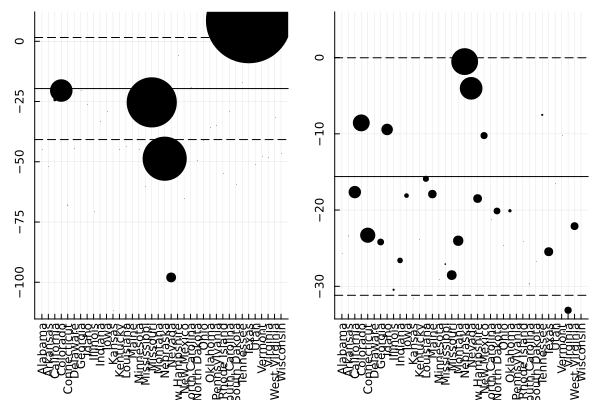

In [70]:
pu1 = synthdid_units_plot(tau_sc, x_ticks = setup.names)
ylim!()
pu2 = synthdid_units_plot(tau_hat, x_ticks = setup.names)
plot(pu1, pu2, layout = (1, 2))


# Customize Plots

In [ ]:
p_did_s = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = .8
	)
p_did_plot = plot(p_did_s["plot"]) 
# title!("Synthetic DiD")
xlabel!("Synthetic DiD")

p_sc = synthdid_plot(
	tau_hat, year_unit_trayectory = setup.time, 
	se_method = "placebo", overlay = .8
	)
p_sc_plot = plot(p_sc["plot"]);
# title!("Synthetic control");
xlabel!("Synthetic control");